Here we are going to use our linear regression model to create some visualization for our sales deck. 

📊 Chart 2: Monthly Inventory Requirements
📦 Monthly Order Summary:
  • Jan: 39 total units (Top: Oldsmobile-Silhouette, 16 units)
  • Feb: 38 total units (Top: Mitsubishi-Diamante, 14 units)
  • Mar: 78 total units (Top: Mitsubishi-Diamante, 28 units)
  • Apr: 83 total units (Top: Chevrolet-Prizm, 29 units)
  • May: 93 total units (Top: Chrysler-LHS, 33 units)
  • Jun: 100 total units (Top: Volkswagen-Passat, 36 units)
  • Jul: 89 total units (Top: Chevrolet-Prizm, 33 units)
  • Aug: 107 total units (Top: Dodge-Ram Pickup, 38 units)
  • Sep: 219 total units (Top: Volkswagen-Jetta, 75 units)
  • Oct: 106 total units (Top: Volkswagen-Passat, 36 units)
  • Nov: 200 total units (Top: Volkswagen-Jetta, 68 units)
  • Dec: 212 total units (Top: Oldsmobile-Silhouette, 74 units)


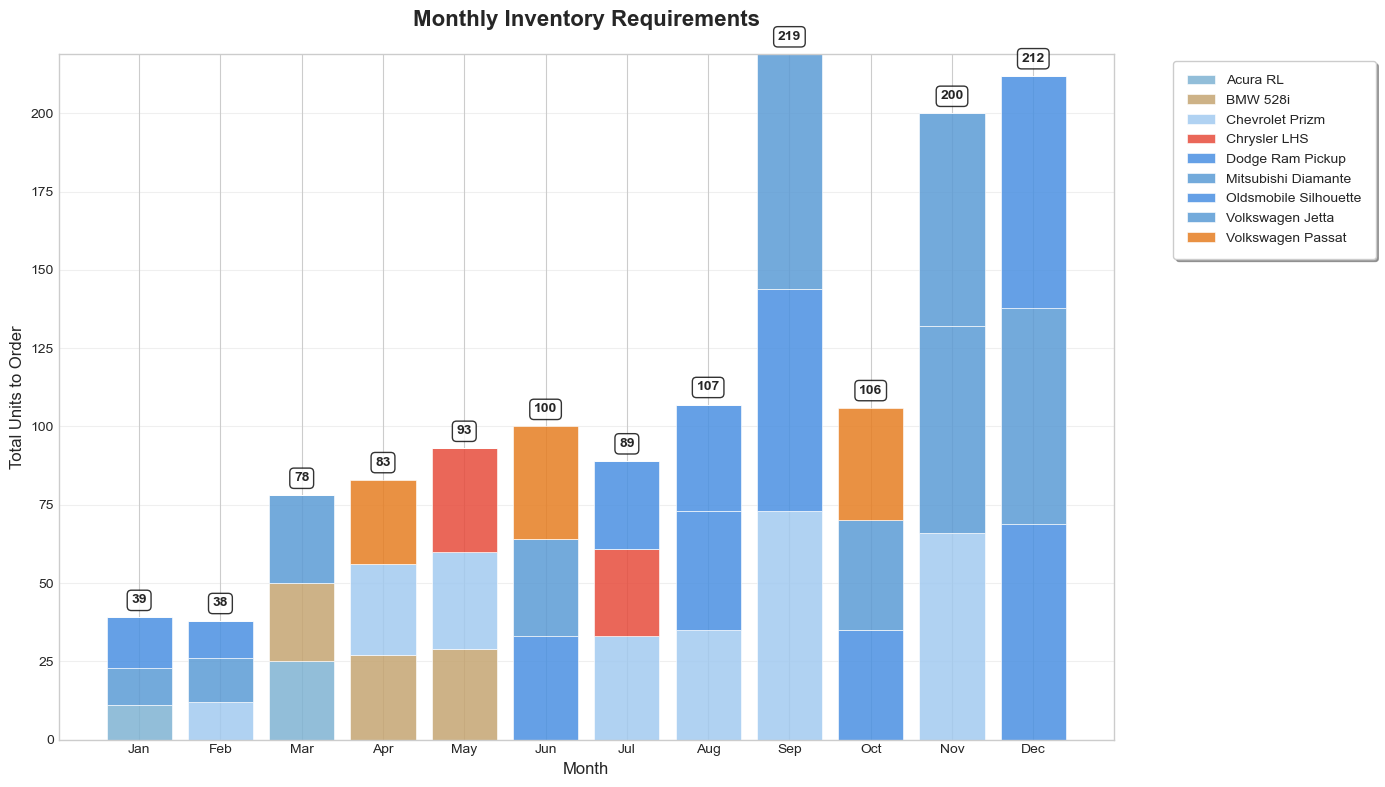

   Shows seasonal peaks and which models drive monthly volumes


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Load the combined forecast data
combined_df = pd.read_csv('../output/combined_forecast_2024.csv')

print("📊 Chart 2: Monthly Inventory Requirements")
print("=" * 40)

# Define corporate color scheme (blue to coral gradient)
corporate_colors = ['#4A90E2', '#5B9BD5', '#7FB3D3', '#A2CAF0', '#C5A572', '#E67E22', '#E74C3C']

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10
})

# Get all unique models across all months
all_models = combined_df['brand_model'].unique()
model_colors = {}
for i, model in enumerate(all_models):
    model_colors[model] = corporate_colors[i % len(corporate_colors)]

# Create the figure
plt.figure(figsize=(14, 8))

# Prepare data for stacked bar chart - include all models for each month
monthly_pivot = combined_df.pivot_table(index='month', columns='brand_model', 
                                       values='forecast_volume', aggfunc='first', fill_value=0)

# Create stacked bar chart
bottom = np.zeros(len(monthly_pivot.index))
bars_info = []

for i, model in enumerate(monthly_pivot.columns):
    bars = plt.bar(monthly_pivot.index, monthly_pivot[model], bottom=bottom,
                   color=model_colors[model], label=model.replace('-', ' '), 
                   alpha=0.85, edgecolor='white', linewidth=0.5)
    bars_info.append(bars)
    bottom += monthly_pivot[model]

plt.title('Monthly Inventory Requirements', fontweight='bold', pad=20, fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Units to Order', fontsize=12)

# Customize x-axis
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add total annotations on top of bars
monthly_totals = combined_df.groupby('month')['forecast_volume'].sum()
for month, total in monthly_totals.items():
    plt.annotate(f'{total}', xy=(month, total), xytext=(0, 8), 
                textcoords='offset points', ha='center', va='bottom', 
                fontweight='bold', fontsize=10, 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Style the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, 
           fancybox=True, shadow=True, borderpad=1)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Show monthly insights
print("📦 Monthly Order Summary:")
for month in range(1, 13):
    month_data = combined_df[combined_df['month'] == month]
    month_total = month_data['forecast_volume'].sum()
    top_model = month_data.loc[month_data['rank'] == 1, 'brand_model'].iloc[0]
    top_volume = month_data.loc[month_data['rank'] == 1, 'forecast_volume'].iloc[0]
    
    month_names = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    print(f"  • {month_names[month]}: {month_total} total units (Top: {top_model}, {top_volume} units)")

plt.show()

print(f"   Shows seasonal peaks and which models drive monthly volumes")

📊 Chart 3: Annual Volume Projections by Model
🏆 Annual Volume Rankings:
  1. Chevrolet-Prizm: 279 units
  2. Dodge-Ram Pickup: 246 units
  3. Mitsubishi-Diamante: 220 units
  4. Volkswagen-Jetta: 178 units
  5. Oldsmobile-Silhouette: 164 units
  6. Volkswagen-Passat: 99 units
  7. BMW-528i: 81 units
  8. Chrysler-LHS: 61 units
  9. Acura-RL: 36 units

📈 Market Share Analysis:
  • Chevrolet-Prizm: 20.5% of total volume
  • Dodge-Ram Pickup: 18.0% of total volume
  • Mitsubishi-Diamante: 16.1% of total volume
  • Volkswagen-Jetta: 13.0% of total volume
  • Oldsmobile-Silhouette: 12.0% of total volume
  • Volkswagen-Passat: 7.3% of total volume
  • BMW-528i: 5.9% of total volume
  • Chrysler-LHS: 4.5% of total volume
  • Acura-RL: 2.6% of total volume

📊 Total 2024 Forecast: 1,364 units across top performers


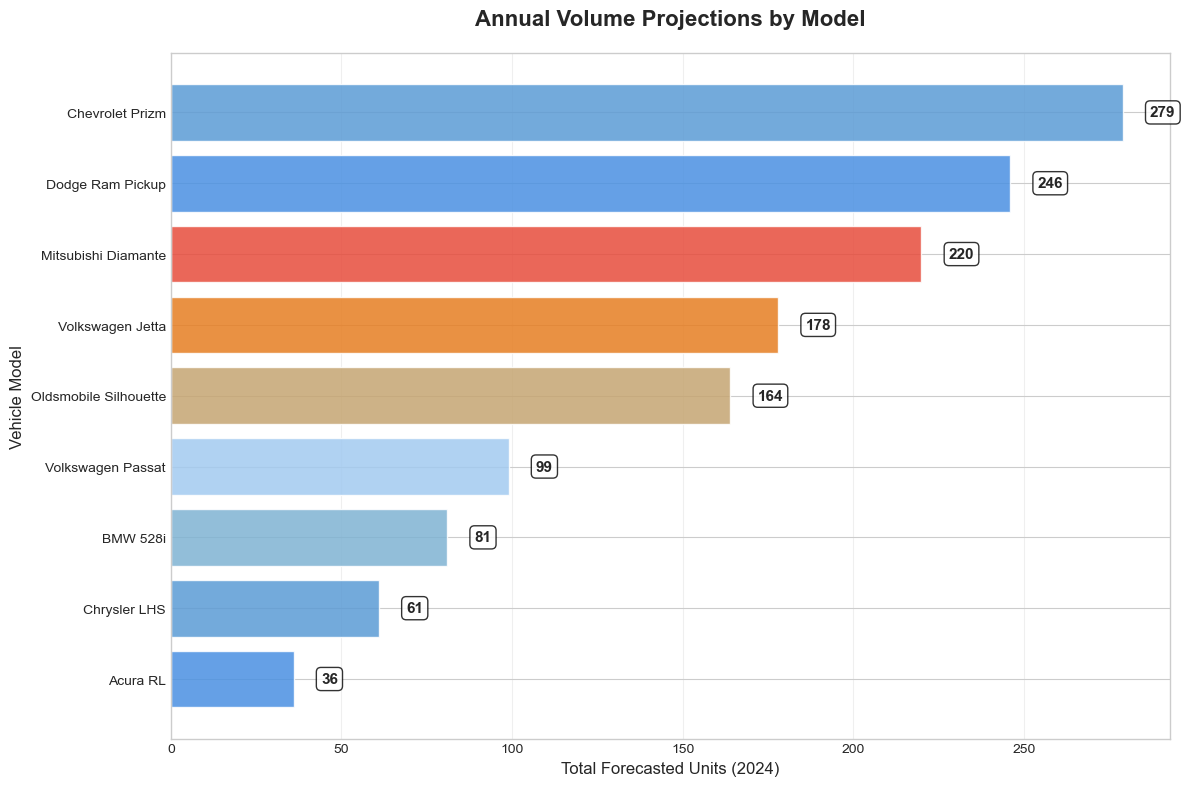


✨ Clean, actionable annual planning data!
   Perfect for executive summary and annual budget planning


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Load the combined forecast data
combined_df = pd.read_csv('../output/combined_forecast_2024.csv')

print("📊 Chart 3: Annual Volume Projections by Model")
print("=" * 45)

# Define corporate color scheme (blue to coral gradient)
corporate_colors = ['#4A90E2', '#5B9BD5', '#7FB3D3', '#A2CAF0', '#C5A572', '#E67E22', '#E74C3C']

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Calculate annual totals by model
annual_totals = combined_df.groupby('brand_model')['forecast_volume'].sum().sort_values(ascending=True)

# Assign colors to models
model_colors = {}
for i, model in enumerate(annual_totals.index):
    model_colors[model] = corporate_colors[i % len(corporate_colors)]

# Create the figure
plt.figure(figsize=(12, 8))

# Create horizontal bar chart
bars = plt.barh(range(len(annual_totals)), annual_totals.values, 
                color=[model_colors[model] for model in annual_totals.index], 
                alpha=0.85, edgecolor='white', linewidth=1)

plt.title('Annual Volume Projections by Model', fontweight='bold', pad=20, fontsize=16)
plt.xlabel('Total Forecasted Units (2024)', fontsize=12)
plt.ylabel('Vehicle Model', fontsize=12)

# Set y-axis labels (clean model names)
plt.yticks(range(len(annual_totals)), 
           [model.replace('-', ' ') for model in annual_totals.index])

# Add value labels on bars
for i, (bar, value, model) in enumerate(zip(bars, annual_totals.values, annual_totals.index)):
    plt.text(bar.get_width() + 8, bar.get_y() + bar.get_height()/2, 
             f'{value:,}', va='center', ha='left', fontweight='bold', fontsize=11,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()

# Show annual insights
print("🏆 Annual Volume Rankings:")
sorted_models = annual_totals.sort_values(ascending=False)
for rank, (model, volume) in enumerate(sorted_models.items(), 1):
    print(f"  {rank}. {model}: {volume:,} units")

# Calculate percentages
total_volume = annual_totals.sum()
print(f"\n📈 Market Share Analysis:")
for model, volume in sorted_models.items():
    percentage = (volume / total_volume) * 100
    print(f"  • {model}: {percentage:.1f}% of total volume")

print(f"\n📊 Total 2024 Forecast: {total_volume:,} units across top performers")

plt.show()

print(f"\n✨ Clean, actionable annual planning data!")
print(f"   Perfect for executive summary and annual budget planning")

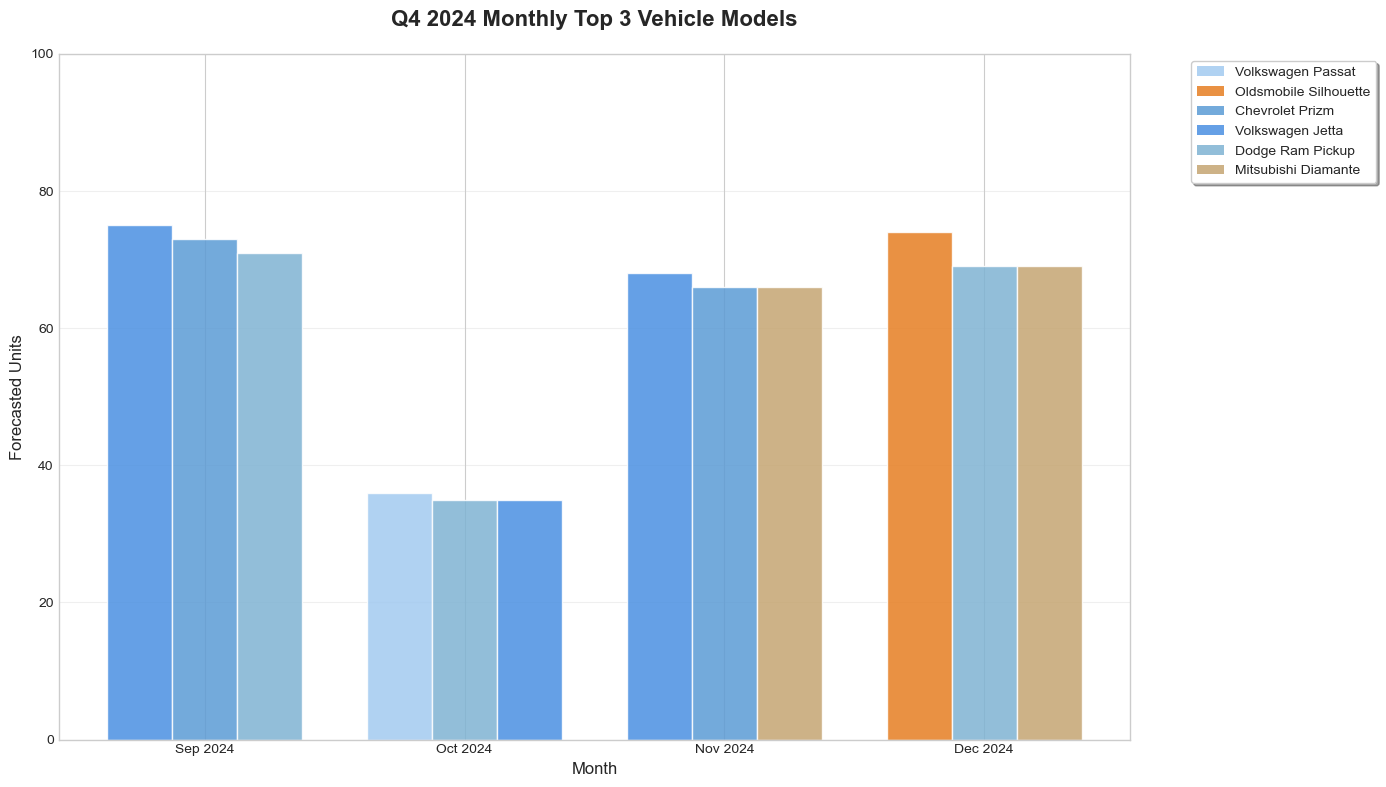

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Load the combined forecast data
combined_df = pd.read_csv('../output/combined_forecast_2024.csv')

# Define corporate colors for models
corporate_colors = ['#4A90E2', '#5B9BD5', '#7FB3D3', '#A2CAF0', '#C5A572', '#E67E22', '#E74C3C']

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10
})

# Filter for Sep-Dec 2024 and get top 3 for each month
q4_months = [9, 10, 11, 12]
q4_data = combined_df[combined_df['month'].isin(q4_months)]

# Get all unique models and assign colors
all_models = q4_data['brand_model'].unique()
model_colors = {}
for i, model in enumerate(all_models):
    model_colors[model] = corporate_colors[i % len(corporate_colors)]

# Create the chart
plt.figure(figsize=(14, 8))

# Set up grouped bar positions
month_labels = ['Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024']
x = np.arange(len(month_labels))
width = 0.25

# Plot bars for each rank position
for rank in [1, 2, 3]:
    rank_data = q4_data[q4_data['rank'] == rank].sort_values('month')
    volumes = rank_data['forecast_volume'].values
    models = rank_data['brand_model'].values
    colors = [model_colors[model] for model in models]
    
    bars = plt.bar(x + (rank-2)*width, volumes, width, 
                   color=colors, alpha=0.85, edgecolor='white', linewidth=1,
                   label=f'Rank {rank}')

plt.title('Q4 2024 Monthly Top 3 Vehicle Models', fontweight='bold', pad=20, fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Forecasted Units', fontsize=12)
plt.xticks(x, month_labels)

# Create legend showing unique models
unique_models_in_plot = list(set(q4_data['brand_model']))
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=model_colors[model], alpha=0.85, 
                                label=model.replace('-', ' ')) 
                  for model in unique_models_in_plot]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', 
           frameon=True, fancybox=True, shadow=True)

plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
